# Creating a better dataframe for FrozenPy
__Notebooked created by:__ Michael Totty

__Aim:__ To create a better dataframe which is tidy, easy to use, and incorporates all metadata.

__Creator:__ Michael Totty

__Change Log:__

3/20/2020 - Created

In [107]:
# ===============================================
# Import essential modules
# ===============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Plot formatting
%matplotlib inline
sns.set(style="ticks", color_codes=True)

# Import MLmedpc functions
path = '/Users/home/Documents/Jupyter/MedPC' # this will need to change depending on MedPC.py locations
os.chdir(path)

from MLmedpc import * 

## First step: Loading data to work with
For this we will just load the Retrieval data from the LE flight pilot.

###  Importing data from .csv files
Now that the data is in the format of a _.raw.csv_ file, we need to import this data into Jupyter so that we can use it. We will do this by use of the _readRaw()_. 

In [108]:
# =============================
# Directories 
# =============================

# Base directory where the experiment/data file exist
base_dir  = '/Volumes/labshare/Michael Totty/Publications/Flight Behavior/Experiments/1. Pilots (LE + SD)/Python Re-Analysis/LE'

# Individual folders containing .out files.
Ret_dir  = f"{base_dir}/Data/7. Ret" 



# =============================
# Load and read .raw.csv files
# =============================

os.chdir(Ret_dir)
Ret_Sq1_Habit = readRaw('20180305 - LE - Day 7 - Sq1 - Habit.raw.csv')
Ret_Sq2_Cond = readRaw('20180305 - LE - Day 7 - Sq2 - Cond.raw.csv')

Ret_Sq1_Cond = readRaw('20180306 - LE - Day 8 - Sq1 - Cond.raw.csv')
Ret_Sq2_Habit = readRaw('20180306 - LE - Day 8 - Sq2 - Habit.raw.csv')



# ===============================
# Convert threshold to freezing
# ===============================

# Habit context
Ret_Sq1_Habit_tf = Thresh2Freezing(Ret_Sq1_Habit)
Ret_Sq2_Habit_tf = Thresh2Freezing(Ret_Sq2_Habit)

Ret_Habit_df = pd.concat([Ret_Sq1_Habit_tf, Ret_Sq2_Habit_tf],axis=1)

# Cond context
Ret_Sq1_Cond_tf = Thresh2Freezing(Ret_Sq1_Cond)
Ret_Sq2_Cond_tf = Thresh2Freezing(Ret_Sq2_Cond)

Ret_Cond_df = pd.concat([Ret_Sq1_Cond_tf, Ret_Sq2_Cond_tf],axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/labshare/Michael Totty/Publications/Flight Behavior/Experiments/1. Pilots (LE + SD)/Python Re-Analysis/LE/Data/7. Ret'

## Step 2: Let's see what our data looks like
In order to know the next steps we need to see what we're working with.

In [11]:
Ret_Cond_df.head()

Time        MT3        MT1        MT5        MT6  Time  \
Threshold 0   0.0   1.464844   4.248047   3.759766  26.416016   0.0   
          1   0.2  40.527344  67.285156   8.349609   7.128906   0.2   
          2   0.4  98.095703  98.828125  15.722656   0.781250   0.4   
          3   0.6  99.218750  91.259766   9.570313   3.564453   0.6   
          4   0.8  99.267578  29.589844   8.544922   7.128906   0.8   

                   MT7       MT8        MT4       MT2  
Threshold 0   2.294922  4.101563  20.312500  6.298828  
          1  14.941406  1.513672  20.654297  0.390625  
          2   3.369141  2.001953  18.945313  1.806641  
          3  16.650391  0.146484  20.458984  9.179688  
          4  23.730469  0.781250  15.429688  7.910156

In [12]:
Ret_Habit_df.head()

Time       MT1        MT5        MT6        MT3  Time        MT2  \
Threshold 0   0.0  2.001953  62.304688  48.193359  49.267578   0.0  59.472656   
          1   0.2  0.048828  87.402344  48.828125   6.542969   0.2  29.101563   
          2   0.4  2.539063  19.921875  27.490234  18.505859   0.4  55.322266   
          3   0.6  0.585938  18.750000  44.824219   9.326172   0.6   3.857422   
          4   0.8  2.880859  99.951172  53.857422  14.013672   0.8  33.056641   

                   MT7        MT8         MT4  
Threshold 0  12.451172  40.673828   16.064453  
          1   9.033203  45.654297   99.951172  
          2  12.646484  28.759766   99.951172  
          3   5.029297  14.111328   33.593750  
          4  17.724609  39.746094  100.000000

So currently we have it such that columns are the respective animals data, and rows are the data across time. We have these awkward 'Time' columns that I need to deal with later

Let's go ahead an chunk the data up and see what it looks like then.

In [13]:
Behav = 'Freezing'

# ===============
# Ret Habit
# ===============

Ret_Habit_form = chunkdata(Ret_Habit_df,Behav,US=0,Trials=4)
Ret_Habit_views = get_dataofinterest(Ret_Habit_form)
Ret_Habit_views.head()


,BL,CS1 1,CS1 2,CS1 3,CS1 4,CS2 1,CS2 2,CS2 3,CS2 4,Post
MT1,16.333333,88.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,97.986577
MT5,1.111111,16.0,60.0,10.0,74.0,64.0,60.0,22.0,98.0,68.456376
MT6,1.888889,48.0,100.0,100.0,100.0,62.0,100.0,100.0,100.0,96.644295
MT3,6.222222,56.0,100.0,84.0,12.0,82.0,100.0,100.0,100.0,67.449664
MT2,11.333333,0.0,100.0,100.0,52.0,70.0,98.0,100.0,70.0,61.409396


In [14]:
Behav = 'Freezing'

# ===============
# Ret Cond
# ===============

Ret_Cond_form = chunkdata(Ret_Cond_df,Behav,US=0,Trials=4)
Ret_Cond_views = get_dataofinterest(Ret_Cond_form)
Ret_Cond_views.head()


,BL,CS1 1,CS1 2,CS1 3,CS1 4,CS2 1,CS2 2,CS2 3,CS2 4,Post
MT3,1.666667,62.0,48.0,92.0,98.0,12.0,56.0,96.0,98.0,89.597315
MT1,47.888889,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,56.375839
MT5,77.666667,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,98.657718
MT6,96.666667,100.0,100.0,100.0,100.0,78.0,100.0,100.0,94.0,79.530201
MT7,45.111111,90.0,98.0,100.0,98.0,68.0,82.0,70.0,98.0,55.704698


So this doesn't look too bad to be. One glaring issues is that each column is seperated such that trials for 'CS1' and 'CS2' are not grouped in any way. I believe there should be a way to do this with a hierachical grouping of some sort. 

## Altering the code so that it properly tidies out data

Ideally I want to make it so this code formats the data in a Tidy format. 

>Tidy datasets are easy to manipulate, model and visualise, and have a specific structure:
>each variable is a column, each observation is a row, and each type of observational unit
>is a table. This framework makes it easy to tidy messy datasets because only a small
>set of tools are needed to deal with a wide range of un-tidy datasets. This structure
>also makes it easier to develop tidy tools for data analysis, tools that both input and
>output tidy datasets

Read more about tyding data:
(1) [Original paper on tidy data](https://vita.had.co.nz/papers/tidy-data.pdf)
(2) [Tidy data for data science](https://r4ds.had.co.nz/tidy-data.html)

To work on this let's bring these functions into this notebook so we can see and adjust the inner workings.

In [17]:
df=Ret_Habit_df
Behav='Freezing'
fs=5
BL=180
Trials=4
CS=[10,10]
Delay=0
US=0
ISI=60
Post=60

if 'Time' in df:
    df.drop('Time',axis=1,inplace=True) # drop 'Time' column

Timestamps = pd.DataFrame()
Timestamps['BL'] = df.xs(Behav)[0:BL*fs].mean()
start_time = BL*fs

for i in range(1,Trials+1):

    Timestamps['Pretone'+str(i)]=df.xs(Behav)[start_time-(10*fs):start_time].mean()

    end_time = start_time+(CS[0]*fs)
    Timestamps['CS1 '+str(i)]=df.xs(Behav)[start_time:end_time].mean()

    start_time = end_time
    end_time   = start_time+(CS[1]*fs)
    Timestamps['CS2 '+str(i)]=df.xs(Behav)[start_time:end_time].mean()

    start_time = end_time+Delay*fs
    end_time   = start_time+(US*fs)
    Timestamps['US'+str(i)]=df.xs(Behav)[start_time:end_time].mean()

    start_time = end_time
    if i < Trials:
            end_time = start_time+(ISI*fs)
            Timestamps['ISI'+str(i)]=df.xs(Behav)[start_time:end_time].mean()
            start_time = end_time

    elif i == Trials:
        end_time = start_time+(Post*fs)
        Timestamps['Post']=df.xs(Behav)[start_time:end_time].mean()



Now let's alter this code to make a new function which properly tidies the data. 

Note: In hindsight, pandas "melt" function could have made this a lot simpler.. 

In [121]:
def slicedata(df, n_trials, start_time, length, ITI, fs=5, Behav='Freezing'):
    
    """Gets timestamps then slices and averages data accordingly

    Parameters
    ----------
    df : pandas dataframe
        dataframe generated from Threshold2Freezing() 
    n_trials : int, optional
        number of trials
    start_time : int, optional
        time of first onset of specified stimulus (CS, US, ISI, etc.)
    length : int, optional
        length in seconds of specified stimulus
    ITI : int, optional
        lenth in seconds of ITI
    fs : int, optional
        sampling frequency (default=5 Hz)
    Behav : str
        desired behavioral data ('Freezing' or 'Threshold'; default='Freezing')
        

    Returns
    -------
    final_data
        a pandas dataframe of sliced and averaged data from the specified stimulus
    """

    # =======================================
    # Make list of [start, stop] timestamps
    # =======================================
    
    # TODO: Need to make this its own function. Would be useful for other things
    
    # initialize timestamps for speed
    timestamps = np.zeros([n_trials,2],dtype=int)
    for trial in range(0,n_trials):
        
        # get start and stop timestamps for each trial
        timestamps[trial]  = [start_time+ITI*trial, start_time+length+ITI*trial]

        
    # =======================================
    # Slice data with timestamps and average
    # =======================================
        
    # initialize final data array
    final_data = np.array([])
    for (start, stop) in timestamps:
        
        # slice data, average, and add to final data array
        averaged_trial = df.xs(Behav)[start*fs:stop*fs].mean().values
        final_data  = np.append(final_data, averaged_trial)
        
    return final_data


help(slicedata)




def get_trial_dataframe(df, n_trials, start_time, stim_length, ITI_length, ID_label, ID_metadata,
                       Trial_label, Trial_metadata, values_label, values_data, additional_dict={}):

    '''
    This function is not currently used. It could be used in get_averagedslices_flight(), but
    I'm sure that it would improve readability of the code. I'll leave it here for now. 
    '''

    CS_data = slicedata(df, Trials, start_time, stim_length, ITI_length)                              # slice data
    dict4pandas = {'ID': ID_metadata, 'Trial': Trial_metadata, 'CS Freezing': CS_data}                # dict for pd
    trial_df   = pd.DataFrame(dict4pandas)                                                            # dataframe
    
    if any(additional_dict):                    # if additional dictionary == True
        trial_df.update(additional_dict)        # update dataframe

    return trial_df

#display(trial_df)

def get_averagedslices_flight(df,BL,SCS,US,ISI,Trials,fs=5,Behav='Freezing',Group=[]):
    
    """Slices and averages data for baseline and individual stimuli within trials

    Parameters
    ----------
    df : pandas dataframe
        dataframe generated from Threshold2Freezing() 
    BL : int, optional
        length of baseline period in seconds
    SCS : list, int, optional
        list of (1) Tone and (2) Noise lengths in seconds
    US : int, optional
        length in seconds of US
    ISI : int, optional
        lenth in seconds of ISI
    Trials : int, optional
        numbers of trials
    fs : int, optional
        sampling frequency (default=5 Hz)
    Behav : str
        desired behavioral data ('Freezing' or 'Threshold'; default='Freezing')
    Group: str
        group metadata to assign. mainly useful for within-subjects data where the same subjects
        have different experimental conditions. Leave as default if not within-subjects. 

    Returns
    -------
    BL_df
        a pandas dataframe with the averaged baseline data
    SCS_df
        a pandas dataframe with the averaged SCS data (Tone and Noise)
    Post_df
        a pandas dataframe with both averaged US and ISI data
    """

    # Housekeeping   
    if 'Time' in df:
        df.drop('Time',axis=1,inplace=True)                                 # drop 'Time' column

        
    # Baseline 
    ID = df.xs(Behav).columns                                               # get IDs
    
    BL_timestamps = [0,BL*fs]                                               # BL timestamps
    BL_data = df.xs(Behav)[BL_timestamps[0]:BL_timestamps[1]].mean().values # slice and average data
    
    dict4pandas = {'ID': ID, 'BL': BL_data}                                 # BL dataframe
    BL_df   = pd.DataFrame(dict4pandas)                                     

    
    # Trial prep
    ID_metadata    = np.tile(ID,Trials)                                         # ID metadata
    Trial_metadata = [ele for ele in range(1,Trials+1) for i in range(len(ID))] # ID metadata
    ITI            = SCS[0]+SCS[1]+US+ISI                                       # ITI length

    
    # SCS - Tone
    
    # TODO: These paragraphs all do the same thing. Can I turn this into a function? 
    
    CS_metadata   = [ele for ele in ['Tone'] for i in range(len(ID)*Trials)]    # tone metadata 
    CS_data = slicedata(df, n_trials=Trials, start_time=BL,                     # slice data
                        length = SCS[0], ITI = ITI) 
    dict4pandas = {'ID': ID_metadata, 'Trial': Trial_metadata,                  # tone dataframe
                   'CS type': CS_metadata, 'CS Freezing': CS_data}
    Tone_df   = pd.DataFrame(dict4pandas)


    # SCS - Noise
    CS_metadata   = [ele for ele in ['Noise'] for i in range(len(ID)*Trials)]   # noise metadata

    start_time = BL + SCS[0]                                                    # start time
    CS_data = slicedata(df, n_trials=Trials, start_time=start_time,             # slice data
                        length = SCS[1], ITI = ITI)
    dict4pandas = {'ID': ID_metadata, 'Trial': Trial_metadata,                  # noise dataframe
                   'CS type': CS_metadata, 'CS Freezing': CS_data}
    Noise_df   = pd.DataFrame(dict4pandas)

    
    # SCS - Total
    SCS_df = Tone_df.append(Noise_df,ignore_index=True)     # SCS dataframe (tone + noise dfs)


    #  US
    start_time = BL + SCS[0] + SCS[1]                                           # start time
    US_data = slicedata(df, n_trials=Trials, start_time=start_time,             # slice data
                        length = US, ITI = ITI)
    dict4pandas = {'ID': ID_metadata, 'Trial': Trial_metadata, 'US': US_data}   # US dataframe
    US_df   = pd.DataFrame(dict4pandas)


    #  ISI
    start_time = BL + SCS[0] + SCS[1] + US                                      # start time
    ISI_data = slicedata(df, n_trials=Trials, start_time=start_time,            # slice data
                         length = ISI, ITI = ITI)
    dict4pandas = {'ID': ID_metadata, 'Trial': Trial_metadata, 'ISI': ISI_data} # ISI dataframe
    ISI_df   = pd.DataFrame(dict4pandas)
    
    Post_df = pd.merge(ISI_df, US_df, on=['ID', 'Trial'], copy='True')   # Post dataframe (ISI + US)
    
    
    #  Group metadata
    if any(Group):
        
        Group_metadata   = [ele for ele in [Group] for i in range(len(ID))] # group metadata
        
        dict4pandas = {'ID': ID, 'Group': Group_metadata}                   # group dataframe
        Group_df   = pd.DataFrame(dict4pandas)
        
        # merge group df to others
        BL_df   = pd.merge(Group_df,BL_df,on='ID',copy='True')              # BL + group
        SCS_df  = pd.merge(Group_df,SCS_df,on='ID',copy='True')             # SCS + group
        Post_df = pd.merge(Group_df,Post_df,on='ID',copy='True')            # Post + group
        
    return BL_df, SCS_df, Post_df

help(get_averagedslices_flight)

# =====================
#  Begin test session
# =====================

Behav='Freezing'
fs=5
BL=180
Trials=4
SCS=[10,10]
US=0
ISI=60


Habit_BL_df, Habit_SCS_df, Habit_ISI_df = get_averagedslices_flight(Ret_Habit_df,BL,SCS,US,ISI,Trials,
                                                                    fs=5,Behav='Freezing',Group='Habit')
Cond_BL_df, Cond_SCS_df, Cond_ISI_df    = get_averagedslices_flight(Ret_Cond_df,BL,SCS,US,ISI,Trials,
                                                                 fs=5,Behav='Freezing',Group='Cond')


display(Habit_BL_df)
display(Cond_BL_df)

display(Habit_SCS_df)
display(Cond_SCS_df)

#display(Habit_ISI_df)



Help on function slicedata in module __main__:

slicedata(df, n_trials, start_time, length, ITI, fs=5, Behav='Freezing')
    Gets timestamps then slices and averages data accordingly
    
    Parameters
    ----------
    df : pandas dataframe
        dataframe generated from Threshold2Freezing() 
    n_trials : int, optional
        number of trials
    start_time : int, optional
        time of first onset of specified stimulus (CS, US, ISI, etc.)
    length : int, optional
        length in seconds of specified stimulus
    ITI : int, optional
        lenth in seconds of ITI
    fs : int, optional
        sampling frequency (default=5 Hz)
    Behav : str
        desired behavioral data ('Freezing' or 'Threshold'; default='Freezing')
        
    
    Returns
    -------
    final_data
        a pandas dataframe of sliced and averaged data from the specified stimulus

Help on function get_averagedslices_flight in module __main__:

get_averagedslices_flight(df, BL, SCS, US, ISI, Trial

,ID,Group,BL
0,MT1,Habit,16.333333
1,MT5,Habit,1.111111
2,MT6,Habit,1.888889
3,MT3,Habit,6.222222
4,MT2,Habit,11.333333
5,MT7,Habit,19.555556
6,MT8,Habit,66.666667
7,MT4,Habit,1.888889


,ID,Group,BL
0,MT3,Cond,1.666667
1,MT1,Cond,47.888889
2,MT5,Cond,77.666667
3,MT6,Cond,96.666667
4,MT7,Cond,45.111111
5,MT8,Cond,96.333333
6,MT4,Cond,70.000000
7,MT2,Cond,93.555556


,ID,Group,Trial,CS type,CS Freezing
0,MT1,Habit,1,Tone,88.0
1,MT1,Habit,2,Tone,100.0
2,MT1,Habit,3,Tone,100.0
3,MT1,Habit,4,Tone,100.0
4,MT1,Habit,1,Noise,100.0
5,MT1,Habit,2,Noise,100.0
6,MT1,Habit,3,Noise,100.0
7,MT1,Habit,4,Noise,100.0
8,MT5,Habit,1,Tone,16.0
9,MT5,Habit,2,Tone,60.0


,ID,Group,Trial,CS type,CS Freezing
0,MT3,Cond,1,Tone,62.0
1,MT3,Cond,2,Tone,48.0
2,MT3,Cond,3,Tone,92.0
3,MT3,Cond,4,Tone,98.0
4,MT3,Cond,1,Noise,12.0
5,MT3,Cond,2,Noise,56.0
6,MT3,Cond,3,Noise,96.0
7,MT3,Cond,4,Noise,98.0
8,MT1,Cond,1,Tone,100.0
9,MT1,Cond,2,Tone,100.0


In [41]:
new_df = pd.merge(BL_df,Tone_df,on='ID',copy='True')
display(new_df)

,ID,BL,Trial,CS type,CS Freezing
0,MT1,16.333333,1,Tone,88.0
1,MT1,16.333333,2,Tone,100.0
2,MT1,16.333333,3,Tone,100.0
3,MT1,16.333333,4,Tone,100.0
4,MT5,1.111111,1,Tone,16.0
5,MT5,1.111111,2,Tone,60.0
6,MT5,1.111111,3,Tone,10.0
7,MT5,1.111111,4,Tone,74.0
8,MT6,1.888889,1,Tone,48.0
9,MT6,1.888889,2,Tone,100.0


So based on above, it doesn't look like we will be able to merge factorial baseline data to repeated measure tones/ITI data. It reseluts in copying the data across trials which woud result in incorrect averaging. Which makes sense because that's probably bad practice anyway. To run actual statistics you would never want it this way anyway. For plotting purposes we will be able to takes averages of the data and then merge. This is be much simpler. Will likely have to add an articial "Trial" column that we just name 'BL' to collapse the data coreectly. 

## Plotting with seaborn

So let's next try plotting this. [Seaborn](https://seaborn.pydata.org/) seems to be the best option for this.

It seems that Seaborn does not have an option for SEM, but I just found out that SEM is essentially a 68% CI.. which I had no idea. Mind=Blown. So instead you can just put `ci=68`.

In [122]:
# Load meta data
metadata_dir  = '/Volumes/labshare/Michael Totty/Publications/Flight Behavior/Experiments/1. Pilots (LE + SD)/Python Re-Analysis/LE/Data'
os.chdir(metadata_dir)

file = 'LE_Flight.metadata.csv'
Metadata_df = pd.read_csv(file, sep=',')
    #display(metadata)
    
    
# Merge BL and metadata
Habit_BL_md_df = pd.merge(Metadata_df,Habit_BL_df,on='ID',copy='True')
 
Cond_BL_md_df = pd.merge(Metadata_df,Cond_BL_df,on='ID',copy='True')
    
Ret_BL_df = Habit_BL_md_df.append(Cond_BL_md_df,ignore_index=True)
display(Ret_BL_df)


# Combine SCS and metadata
Habit_SCS_md_df = pd.merge(Metadata_df,Habit_SCS_df,on='ID',copy='True')

Cond_SCS_md_df = pd.merge(Metadata_df,Cond_SCS_df,on='ID',copy='True')
    
# Combine Habit and Cond data
Ret_SCS_df = Habit_SCS_md_df.append(Cond_SCS_md_df,ignore_index=True)
display(Ret_SCS_df)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/labshare/Michael Totty/Publications/Flight Behavior/Experiments/1. Pilots (LE + SD)/Python Re-Analysis/LE/Data'

(0, 100)

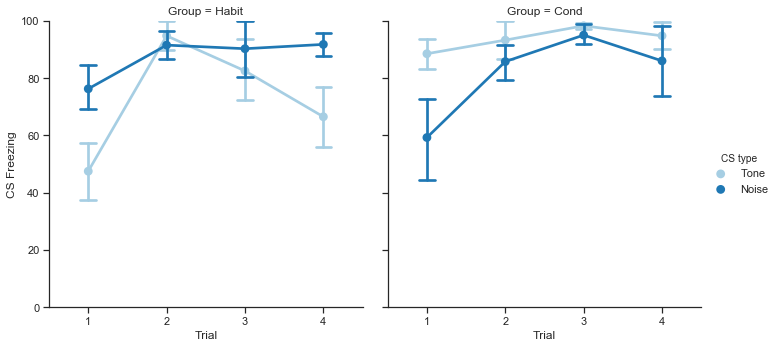

In [77]:
# Plot three-anova: Tone v Noise and Habit v Cond
g = sns.catplot(x='Trial', y='CS Freezing', hue='CS type', col='Group', kind='point',
                 capsize=.2, palette="Paired", ci=68, data=Ret_SCS_df)

plt.ylim(0, 100)

(0, 100)

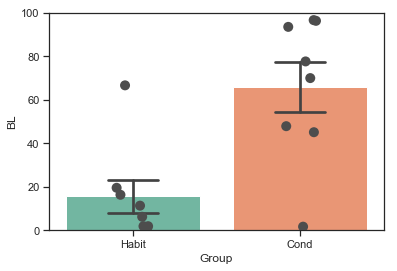

In [103]:
# Plot BL factorial with jitter: Habit v Cond

# jitter
bp = sns.stripplot(x='Group', y='BL', color='.3', size=10,  data=Ret_BL_df)

#barplot
bp = sns.barplot(x='Group', y='BL', palette='Set2', capsize=.3, ci=68, data=Ret_BL_df)

plt.ylim(0, 100)

(0, 100)

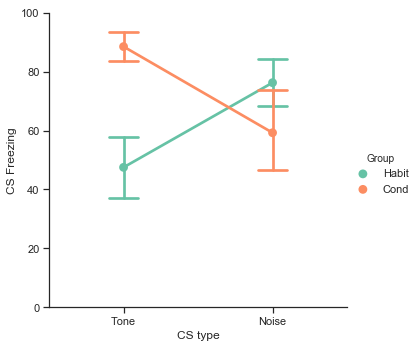

In [105]:
# Plot just the first trial of retrieval

# get first trial data
First_trials      = Ret_SCS_df[Ret_SCS_df['Trial'] == 1]

# plot
g = sns.catplot(x='CS type', y='CS Freezing', hue='Group', kind='point',
                 capsize=.2, palette='Set2', ci=68, data=First_trials)
plt.ylim(0, 100)


### Saving 

This looks correct, but also kind of blurry and there is no clear way to interact with/save the plot. This should be pretty simple with the below code though. The `.savefig` [function](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html) allows you to save as various filetypes and even define the dpi. Pretty handy!

In [ ]:
Cond_dir = '/Volumes/labshare/Michael Totty/Experiments/CRH IED/1. CeA CRH hM4D pilot/Data/1. Conditioning'
os.chdir(Cond_dir)

g.savefig('test_python.png',dpi=300)

### TODO: 
[X]  Merge with group, exclusion metadata

[X] Integrate new functions into FrozenPy.py

[X] Wrap up this notebook

[ ] Seperate flight from standard function

[ ] Document all FrozenPy functions

[ ] Start on github documentation. Plotting util should come after Frozen Py 0.1.0